In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples


In [4]:
selected_columns = ['sepal length (cm)','sepal width (cm)']

In [5]:
iris = load_iris(as_frame=True)
X = iris.data[selected_columns]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.7105263157894737

In [7]:
params = ('uniform', 'distance')

Accuracy for param='uniform': 0.7105263157894737
Accuracy for param='distance': 0.631578947368421


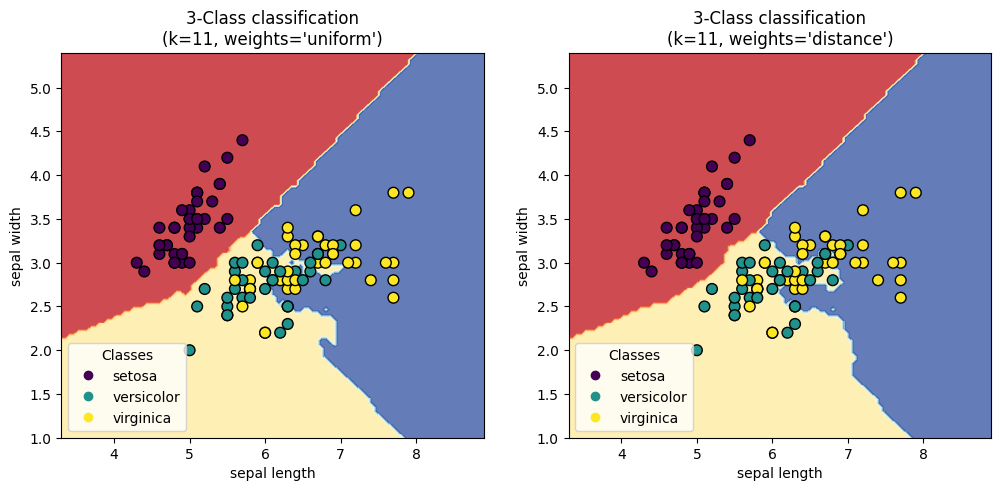

In [8]:
_, axes = plt.subplots(ncols=len(params), figsize=(12,5))
for ax, param in zip(axes, params):
    model.set_params(knn__weights = param).fit(X_train, y_train)
    print(f'Accuracy for {param=}: {model.score(X_test, y_test)}')
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_train, cmap=plt.cm.RdYlBu, alpha=0.8, ax=ax, response_method='predict'
    )
    scatter = disp.ax_.scatter(X_train[selected_columns[0]], X_train[selected_columns[1]], c = y_train, s=60, edgecolor='k')
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc='lower left',
        title='Classes',
    )
    _ = disp.ax_.set_title(f"3-Class classification\n(k={model[-1].n_neighbors}, weights={param!r})")
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')

In [9]:
k_range = range(1, 31)
scores = []

for k in k_range:
    model.set_params(knn__n_neighbors=k).fit(X_train, y_train)
    scores.append(model.score(X_test,y_test))

In [10]:
scores

[0.631578947368421,
 0.6052631578947368,
 0.631578947368421,
 0.631578947368421,
 0.631578947368421,
 0.631578947368421,
 0.6052631578947368,
 0.631578947368421,
 0.631578947368421,
 0.631578947368421,
 0.631578947368421,
 0.631578947368421,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.631578947368421,
 0.631578947368421,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368,
 0.6052631578947368]

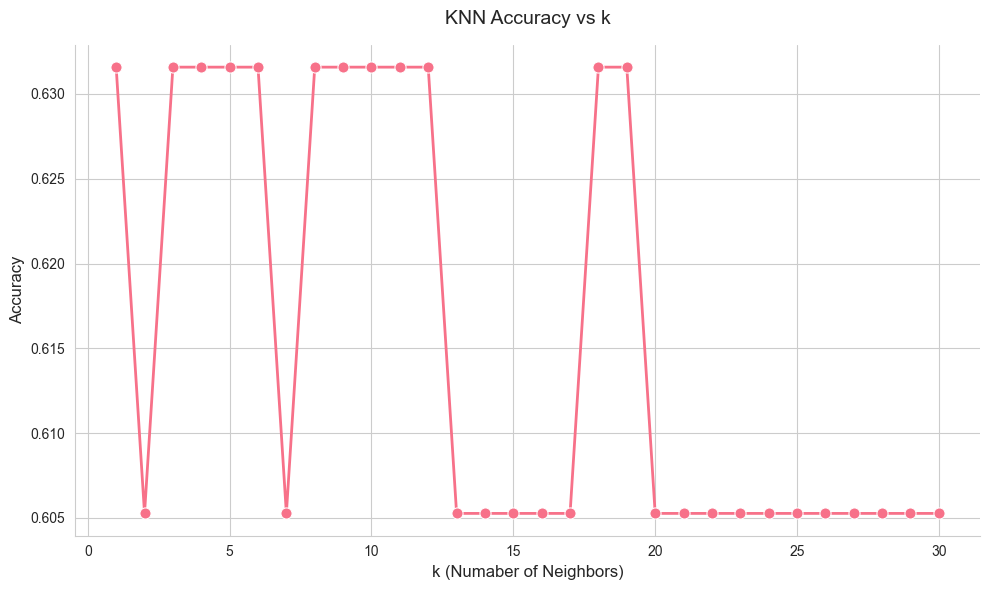

In [11]:
sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=scores, marker='o', linewidth=2, markersize=8)

plt.xlabel('k (Numaber of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Accuracy vs k', fontsize=14, pad=15)

sns.despine(left=False, bottom=False)
plt.tight_layout()

In [12]:
from sklearn import neighbors
from sklearn.cluster import KMeans


In [13]:
rng = np.random.RandomState(42)
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]

y = np.sin(X_train).ravel()
y[::5] += (0.5 - np.random.rand(8))

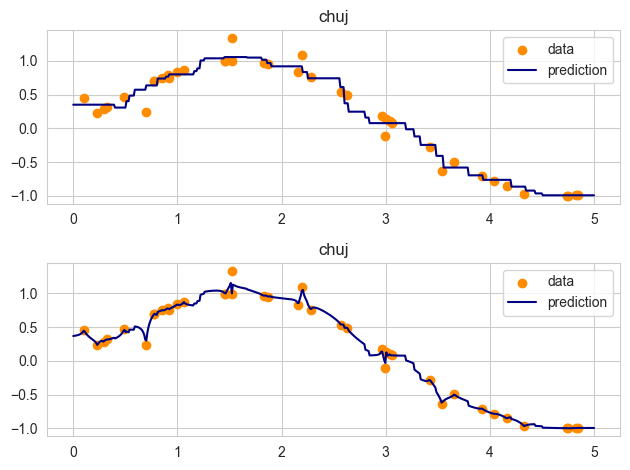

In [14]:
n_neighbors = 5

for i, weights in enumerate(params):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y).predict(X_test)

    plt.subplot(2, 1, i+1)
    plt.scatter(X_train, y, color='darkorange', label='data')
    plt.plot(X_test, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('chuj')

plt.tight_layout()
plt.show()

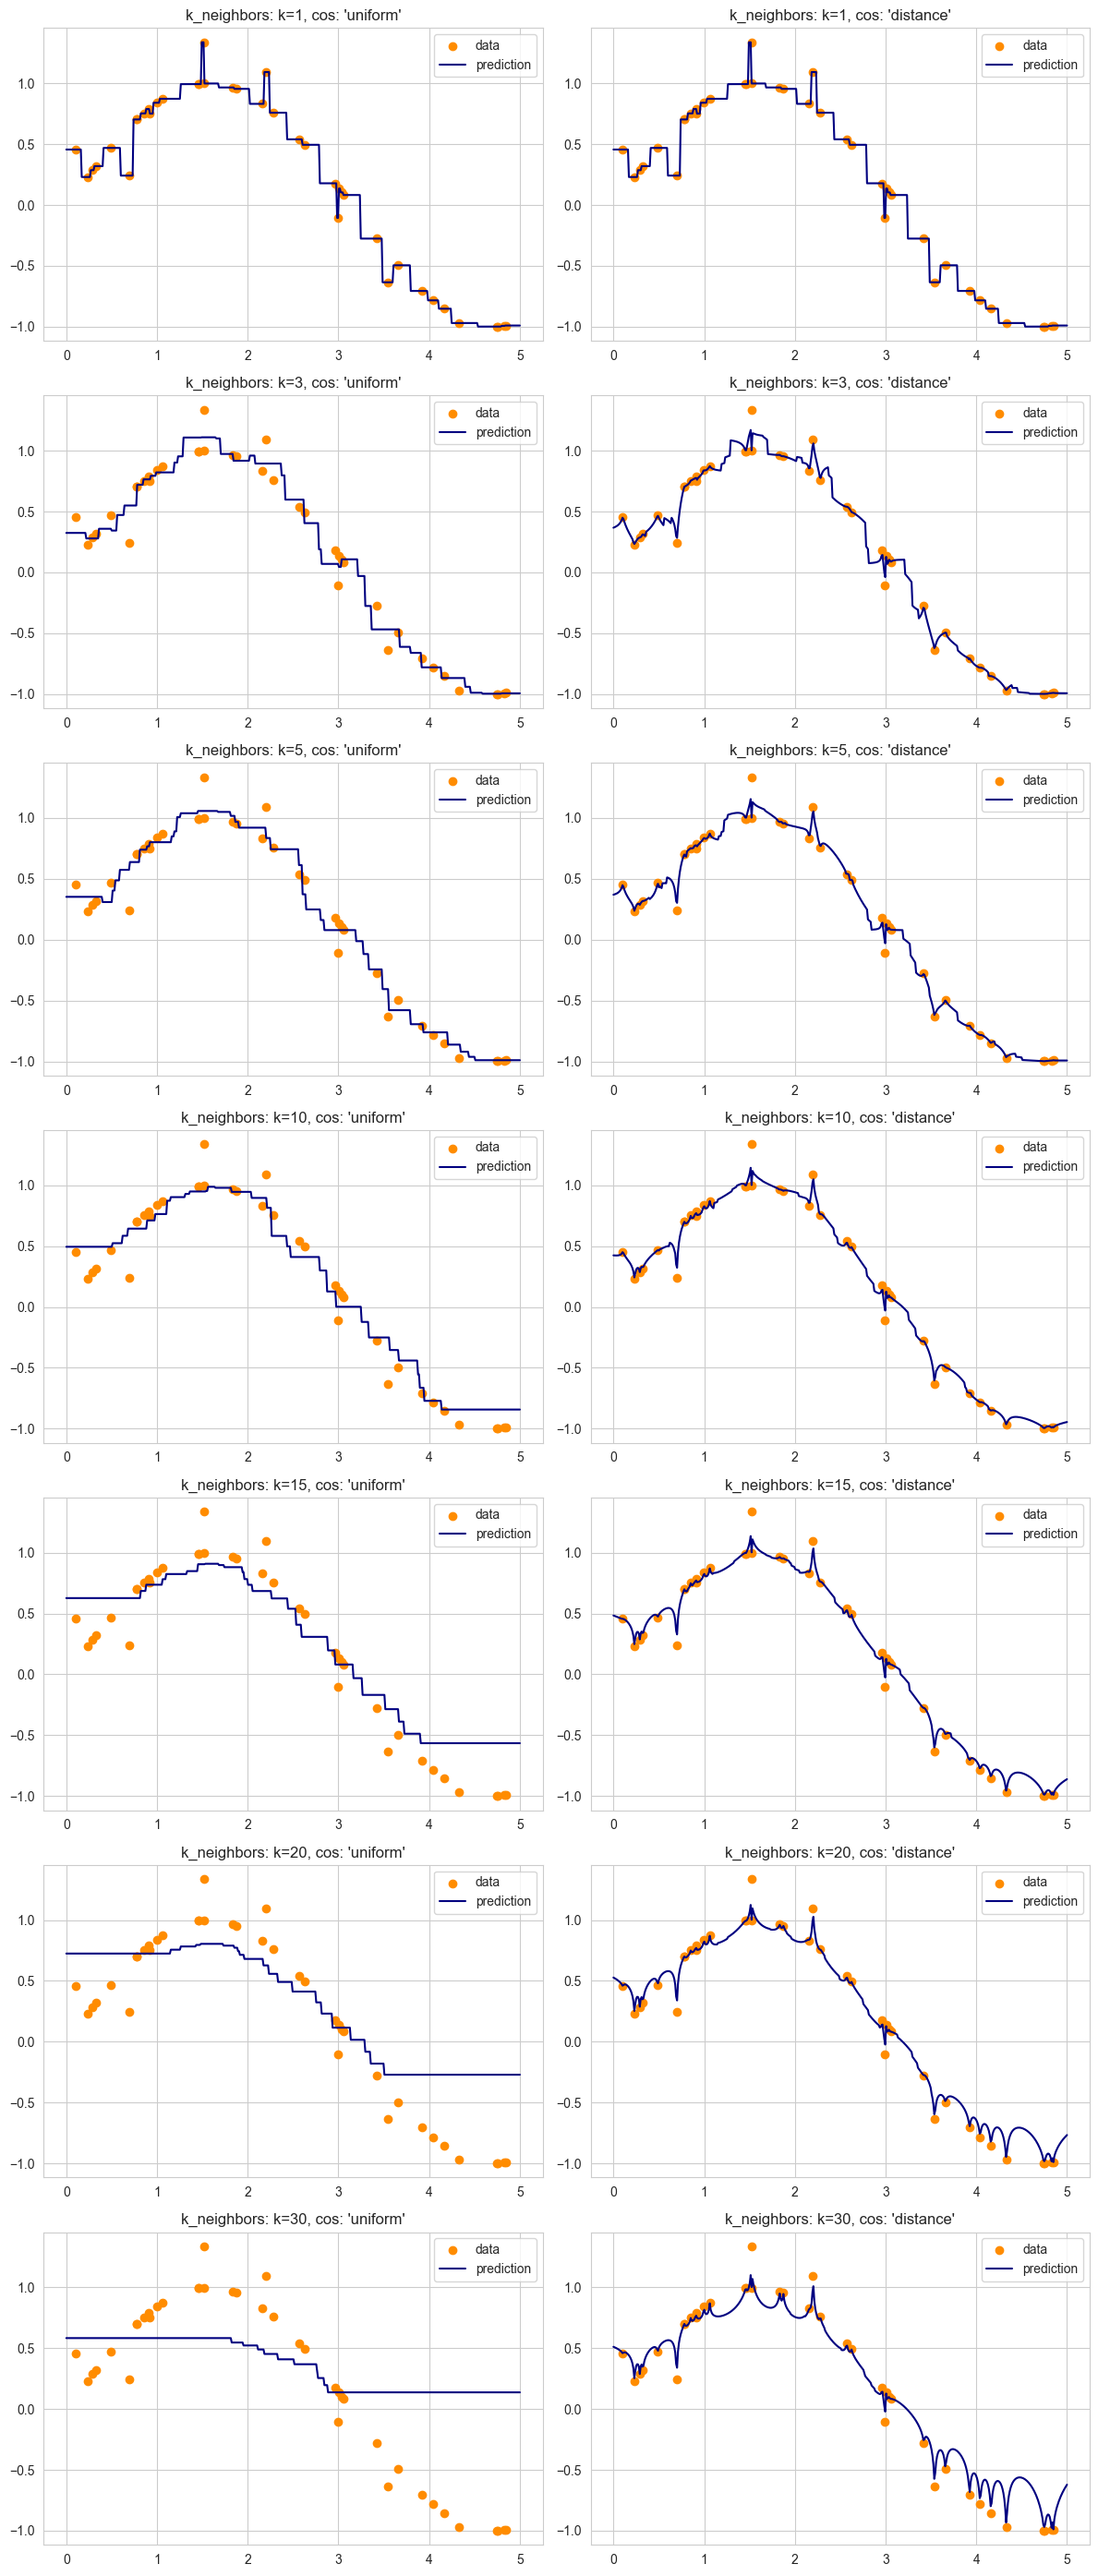

In [15]:
n_neighbors_list = [1, 3, 5, 10, 15, 20, 30]

plt.figure(figsize=(12, 4*len(n_neighbors_list)))

for i, k in enumerate(n_neighbors_list):
    for j, weights in enumerate(params):
        knn = neighbors.KNeighborsRegressor(k, weights=weights)
        y_ = knn.fit(X_train, y).predict(X_test)

        plt.subplot(len(n_neighbors_list), 2, i*2 + j + 1)
        plt.scatter(X_train, y, color='darkorange', label='data')
        plt.plot(X_test, y_, color='navy', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title(f'k_neighbors: k={k}, cos: \'{weights}\'')

plt.tight_layout()

In [16]:
X, y = make_blobs(n_samples=2000, centers=5, cluster_std=[1.0, 2.5, 0.5, 1.5, 3.0], random_state=42)

In [17]:
X.shape

(2000, 2)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

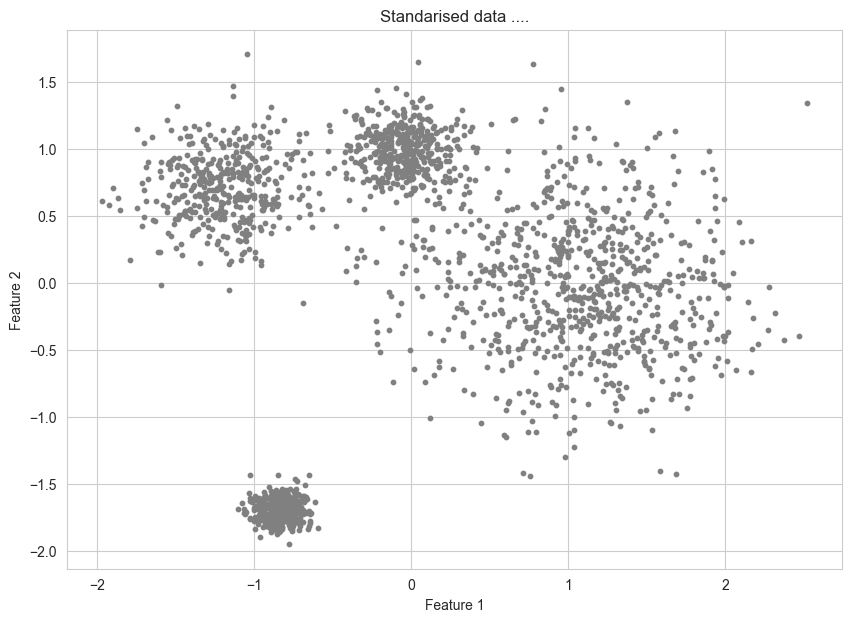

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, c='gray')
plt.title('Standarised data ....')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
sse = []
silhouette_scores = []
ks = range(2, 20)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packa

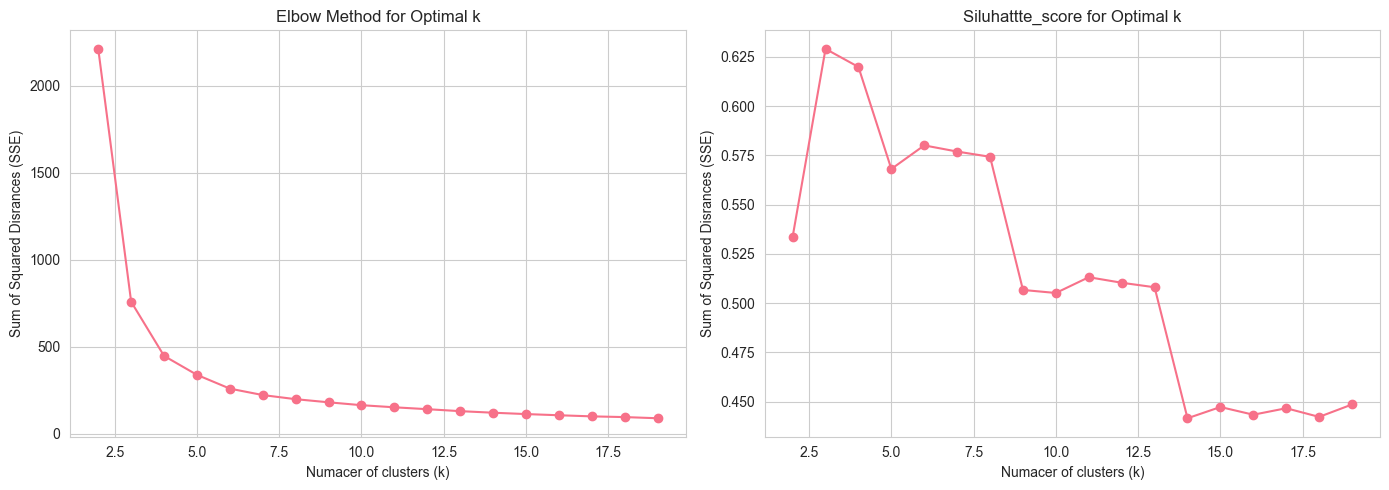

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(ks, sse, marker='o')
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Numacer of clusters (k)')
ax1.set_ylabel('Sum of Squared Disrances (SSE)')

ax2.plot(ks, silhouette_scores, marker='o')
ax2.set_title('Siluhattte_score for Optimal k')
ax2.set_xlabel('Numacer of clusters (k)')
ax2.set_ylabel('Sum of Squared Disrances (SSE)')

plt.tight_layout()

In [22]:
k_opt = 4
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42)
kmeans_opt.fit(X_scaled)

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [23]:
labels = kmeans_opt.labels_

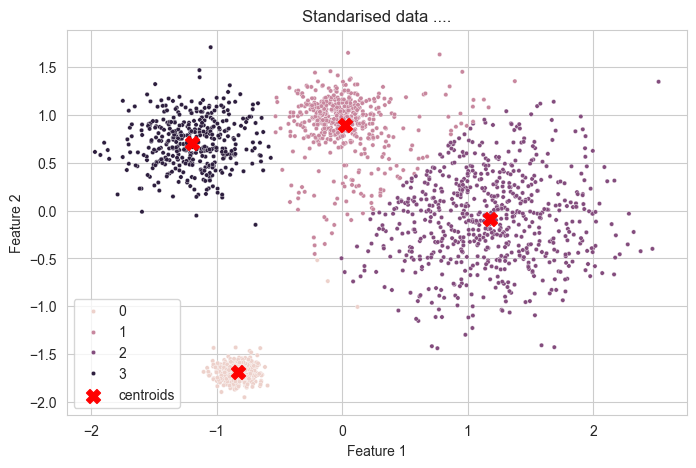

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, s=10)
plt.scatter(kmeans_opt.cluster_centers_[:, 0], kmeans_opt.cluster_centers_[:, 1], s=100, c='red', label='centroids', marker='X')
plt.title('Standarised data ....')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spataial import pdist

In [30]:
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[0, 0], scale=1.0, size=(30, 2)),
    np.random.normal(loc=[3, 4], scale=0.5, size=(30, 2)),
    np.random.normal(loc=[10, 0], scale=2.0, size=(30, 2))
])

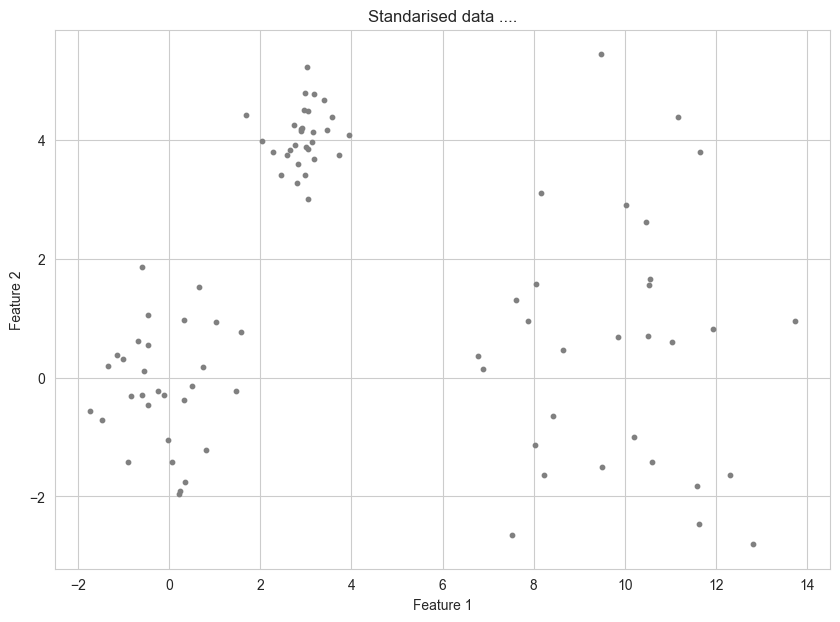

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], s=10, c='gray')
plt.title('Standarised data ....')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [32]:
agg_clustering = linkage(data, method='ward')

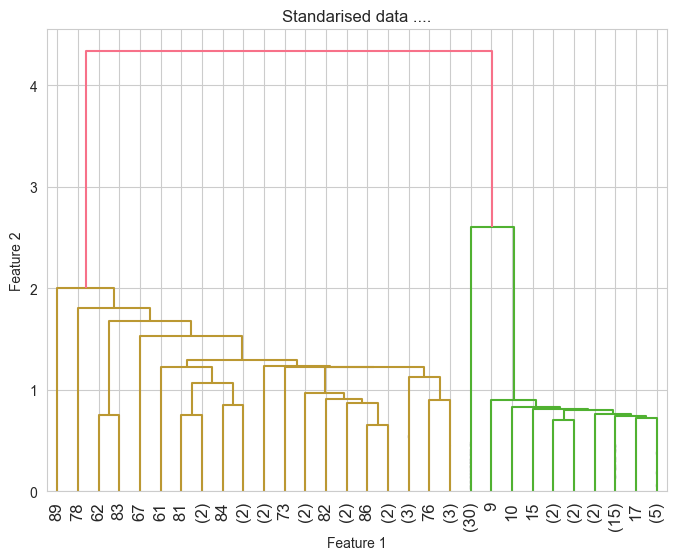

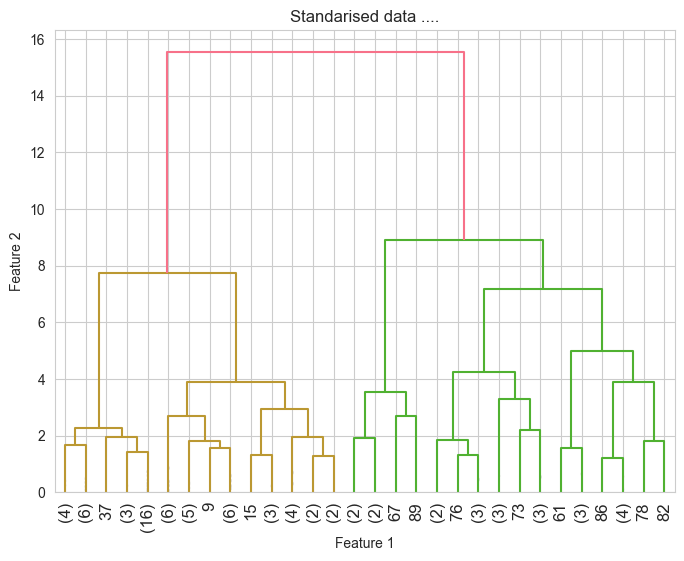

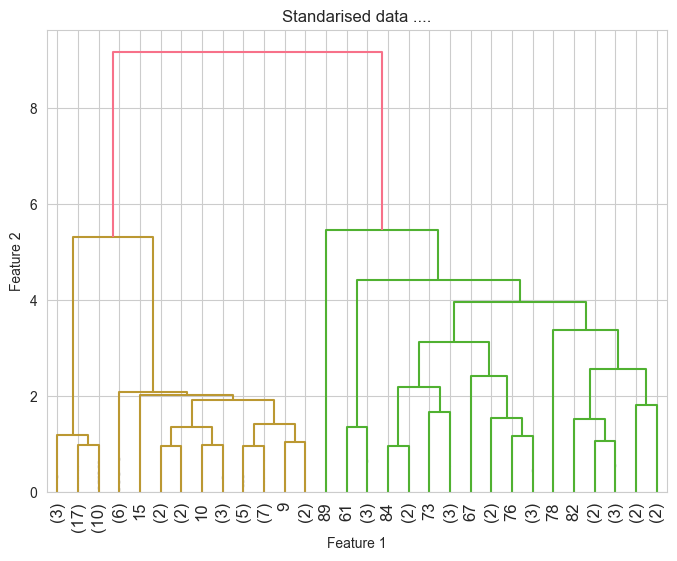

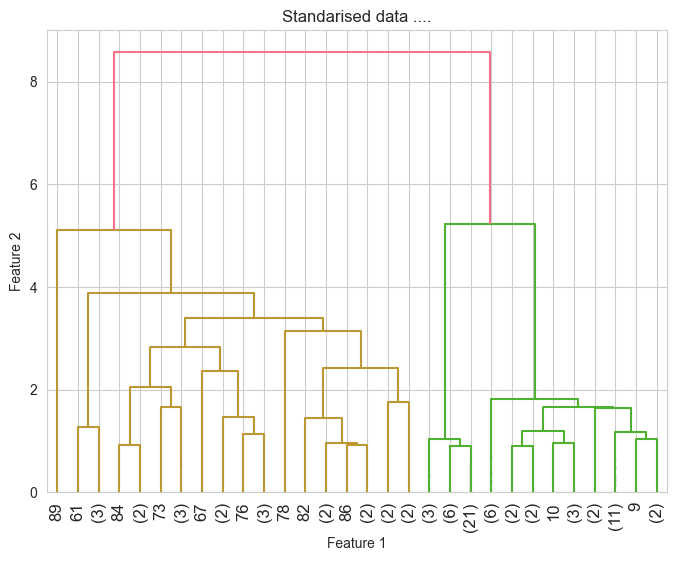

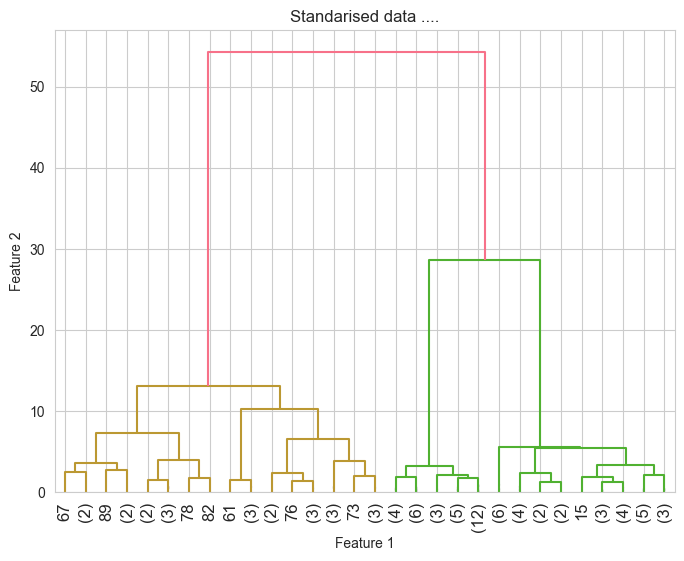

In [37]:
for method in ['single', 'complete', 'average', 'centroid', 'ward']:
    plt.figure(figsize=(8, 6))
    agg_clustering = linkage(data, method=method)
    dendrogram(agg_clustering, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12., show_contracted=True)
    plt.title('Standarised data ....')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 3

agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_model.fit_predict(data)

In [39]:
silhouette_avg = silhouette_score(data, cluster_labels)


In [40]:
silhouette_avg

0.6832953125786405

In [42]:
range_n_clusters = list(range(2, 11))

In [41]:
silhouette_avgs = []
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clustering', AgglomerativeClustering(linkage='ward'))
])

In [43]:
for n_clusters in range_n_clusters:
    pipeline.set_params(clustering__n_clusters=n_clusters)
    cluster_labels = pipeline.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f'Avrtagr Silhuette Scorr {n_clusters=}: {silhouette_avg:.3f}')

Avrtagr Silhuette Scorr n_clusters=2: 0.622
Avrtagr Silhuette Scorr n_clusters=3: 0.683
Avrtagr Silhuette Scorr n_clusters=4: 0.613
Avrtagr Silhuette Scorr n_clusters=5: 0.599
Avrtagr Silhuette Scorr n_clusters=6: 0.491
Avrtagr Silhuette Scorr n_clusters=7: 0.507
Avrtagr Silhuette Scorr n_clusters=8: 0.531
Avrtagr Silhuette Scorr n_clusters=9: 0.513
Avrtagr Silhuette Scorr n_clusters=10: 0.507


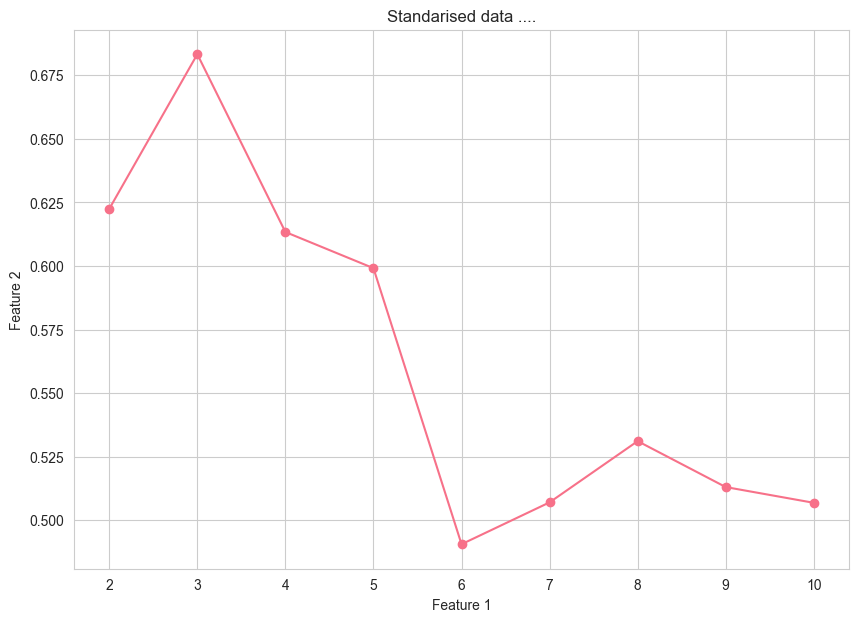

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.title('Standarised data ....')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(range_n_clusters)
plt.grid(True)

Text(0, 0.5, 'Feature 2')

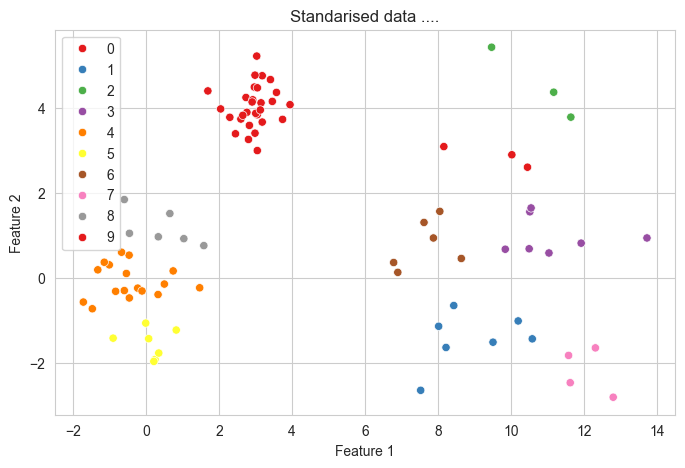

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels, palette='Set1')

plt.title('Standarised data ....')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

